**Project Features:**

* **TV Ad Budget ($):** Amount spent on TV advertising, one of the most traditional marketing channels. This investment can directly influence brand reach and perception.

- **Radio Ad Budget ($):** Amount invested in radio advertising. Like TV, radio is a mass communication medium, and its expenses can help increase brand recognition.

- **Newspaper Ad Budget ($):** Amount allocated to newspaper advertising. Although not as popular as TV or radio, this channel still has an impact in certain regions or demographic groups.

- **Sales ($):** Volume of sales made by the company. This is the main indicator of the success of advertising campaigns and the company’s overall market performance.



**Import the data**

In [58]:
# Impport libraries
import pandas as pd
import numpy as np
import pandas.plotting as scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [59]:
# Loading the dataset
data= pd.read_csv('Advertising Budget and Sales.csv')
data.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Evaluate data quality**

In [60]:
# Verify general info and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [61]:
# Check for duplicated rows
duplicate_rows = data.duplicated().sum()
print("Duplicated Rows:", duplicate_rows)

Duplicated Rows: 0


In [62]:
# Check statistical data
data.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [63]:
# Remove index column
data = data.drop(columns=['Unnamed: 0'])

- After performing the data evaluation, it was identified that the dataset contains 200 rows and 5 columns, with one column containing integer values and the other four containing decimal values.
- It was also found that there are no null values or duplicated rows.
- Following the statistical analysis, it was confirmed that the column 'Unnamed: 0' was an index, and therefore it was removed at this stage in order to avoid distortions in subsequent analyses.



**Evaluate the behavior of the variables**

<ipython-input-64-b466843fa9a4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sales ($)'], color='g', hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


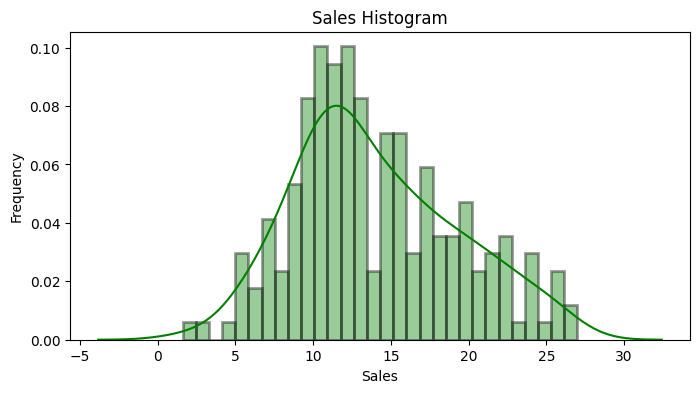

In [64]:
# Sales Histogram
plt.figure(figsize=(8, 4))
sns.distplot(data['Sales ($)'], color='g', hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.xlabel('Sales')
plt.title('Sales Histogram')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [65]:
# Correlation Matrix
corr_matrix_sales = data.corr()['Sales ($)']
target_corr = np.abs(data.corrwith(data['Sales ($)']))
print(target_corr.sort_values(ascending=False))

Sales ($)                  1.000000
TV Ad Budget ($)           0.782224
Radio Ad Budget ($)        0.576223
Newspaper Ad Budget ($)    0.228299
dtype: float64


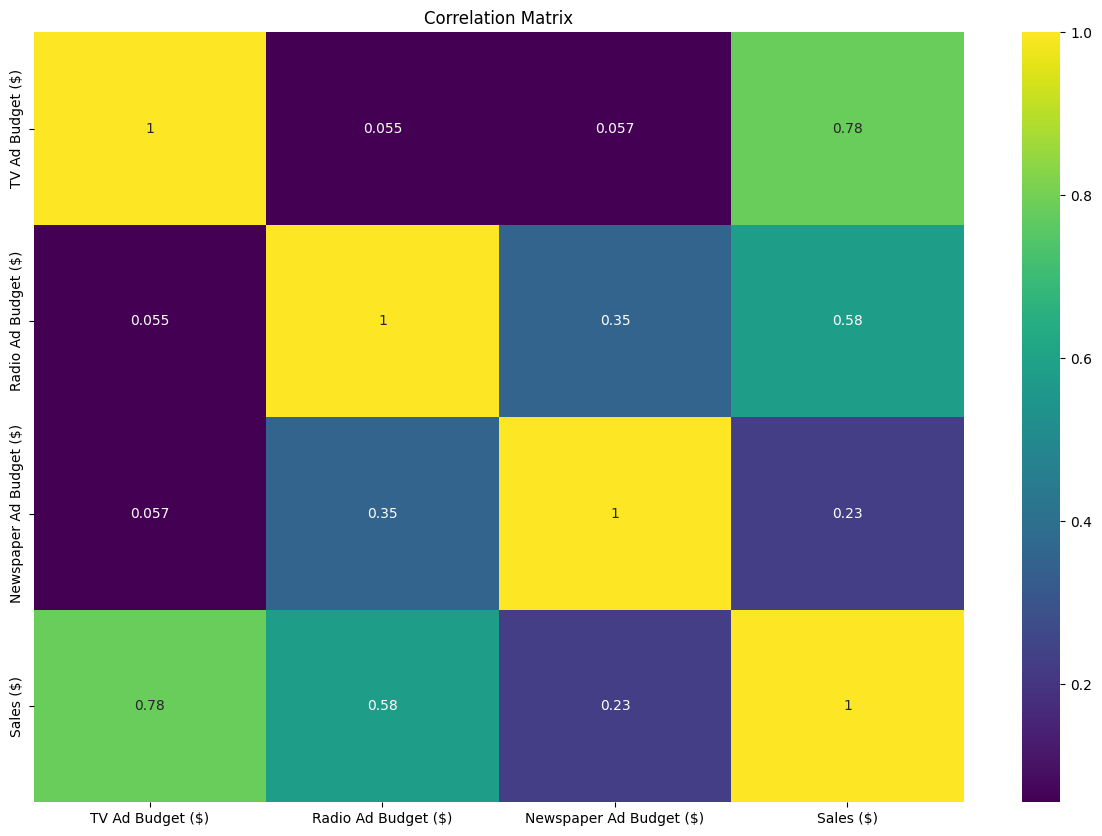

In [66]:
# Correlation Matrix Plot
corr_matrix_sales = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_sales, cmap="viridis", annot=True)
plt.title('Correlation Matrix')
plt.show()

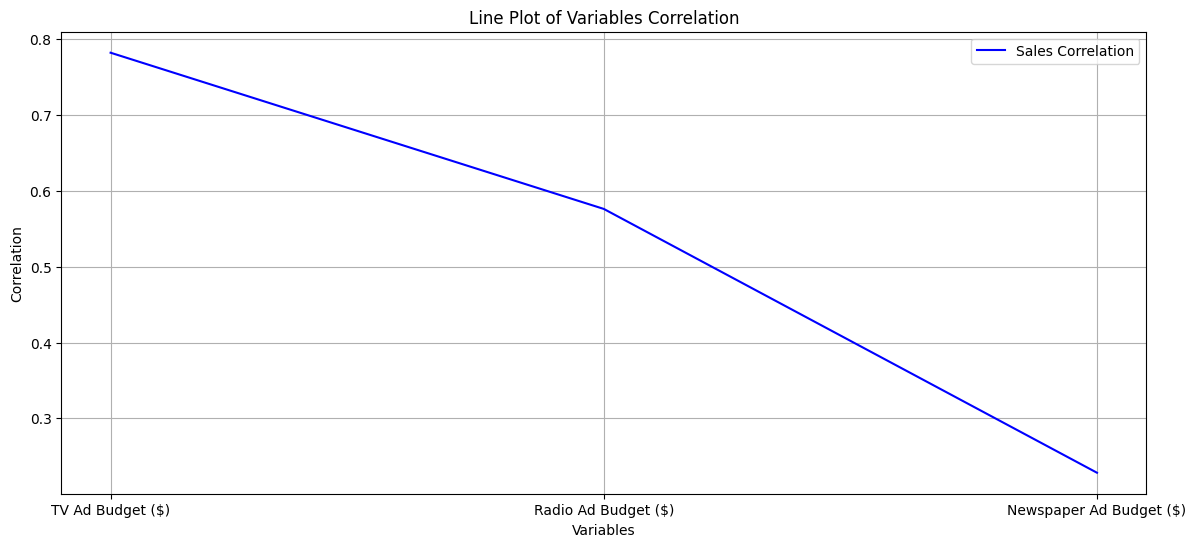

In [67]:
# Line Plot of Variables' Correlation
plt.figure(figsize=(14, 6))
plt.plot(corr_matrix_sales['Sales ($)'].sort_values(ascending=False)[1:], label='Sales Correlation', color='blue')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Line Plot of Variables Correlation')
plt.grid(True)
plt.legend()
plt.show()

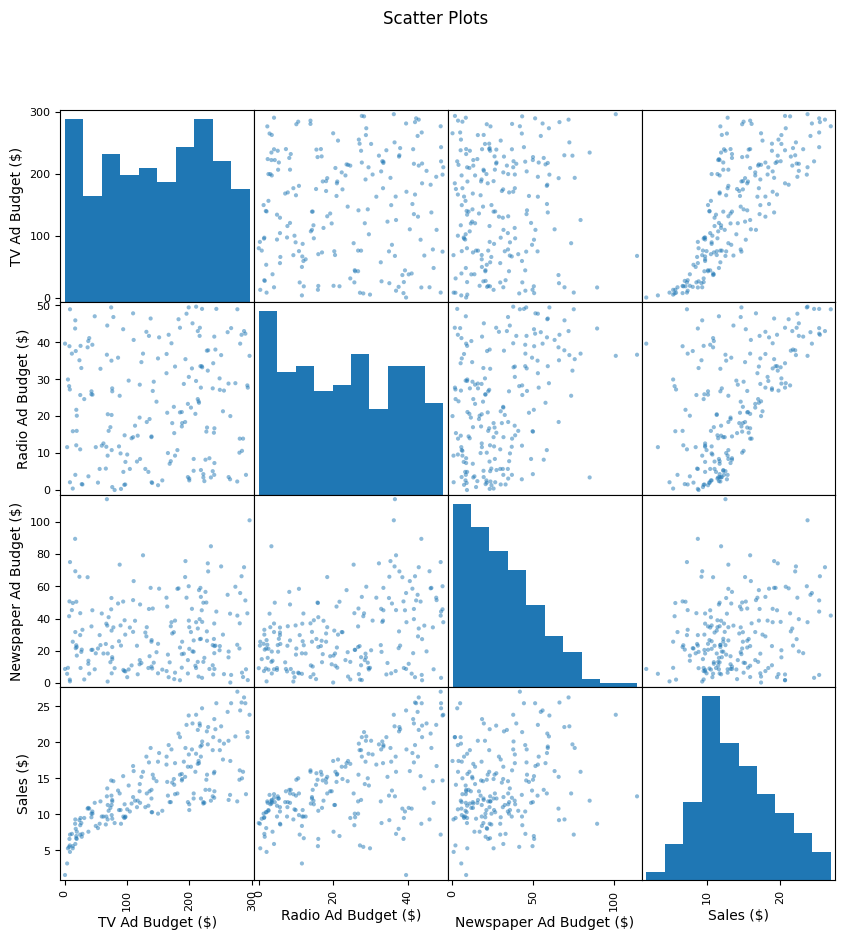

In [68]:
# Scatter Plots
columns = ['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)', 'Sales ($)']
pd.plotting.scatter_matrix(data[columns], alpha=0.5, figsize=(10, 10))
plt.suptitle('Scatter Plots')
plt.show()

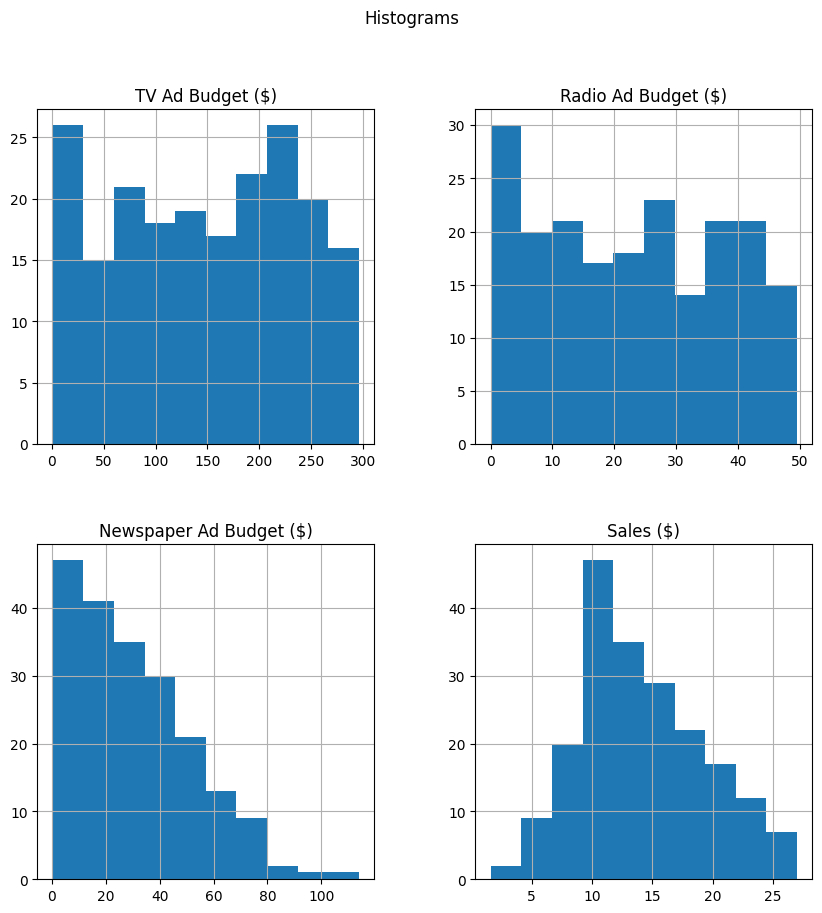

In [69]:
# Histogram
data.hist(figsize=(10, 10))
plt.suptitle('Histograms')
plt.show()

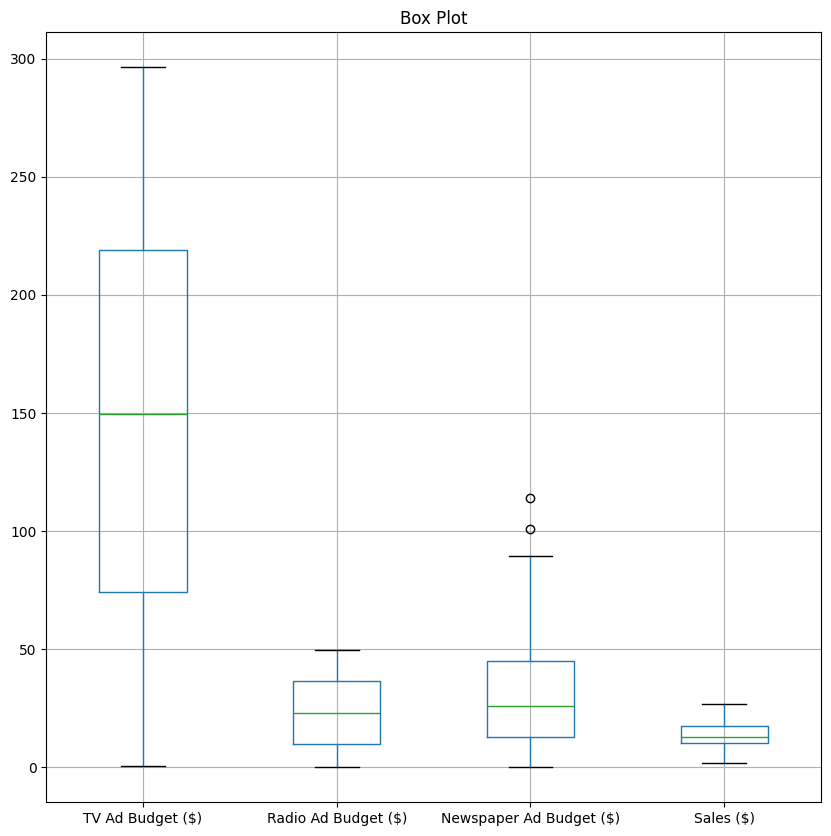

In [70]:
# Box Plot
data.boxplot(figsize=(10, 10))
plt.title('Box Plot')
plt.show()

- Upon analyzing the Sales histogram, we observed a slightly higher concentration to the left, with a slight tail to the right.
- The correlation matrix revealed a strong positive correlation between Sales and TV Ad Budget, indicating that higher investments in TV ads are associated with higher sales. On the other hand, the correlation with Radio Ad Budget showed a moderate positive correlation, while the correlation with Newspaper Ad Budget exhibited a weak positive correlation.
- In the scatter plots, the most notable feature is the strong positive correlation between Sales and TV Ad Budget. The plots of Sales compared to Radio Ad Budget showed greater dispersion, while the plots of Sales versus Newspaper Ad Budget displayed even greater dispersion.
- One aspect that caught attention when observing the histograms was the histogram of Newspaper Ad Budget, which showed a progressive decline in frequency as the expenditure increased. This pattern resembles a descending staircase, suggesting that higher investments in newspaper ads are rare events. This could indicate that these expenditures didn't generate the expected return, as suggested by the weak correlation.
- The analysis of the boxplot visually revealed the presence of two outliers in the Newspaper Ad Budget. These outliers could be explained by special events or campaigns where a large investment in ads was made for specific occasions.

**Prepare the data for more detailed analysis**

In [71]:
# Dropping unnecessary variables
data = data.drop(columns=['Newspaper Ad Budget ($)'])

In [72]:
# Finding outliers
z = np.abs(stats.zscore(data))
outliers = np.where(z > 3)
outliers

(array([], dtype=int64), array([], dtype=int64))

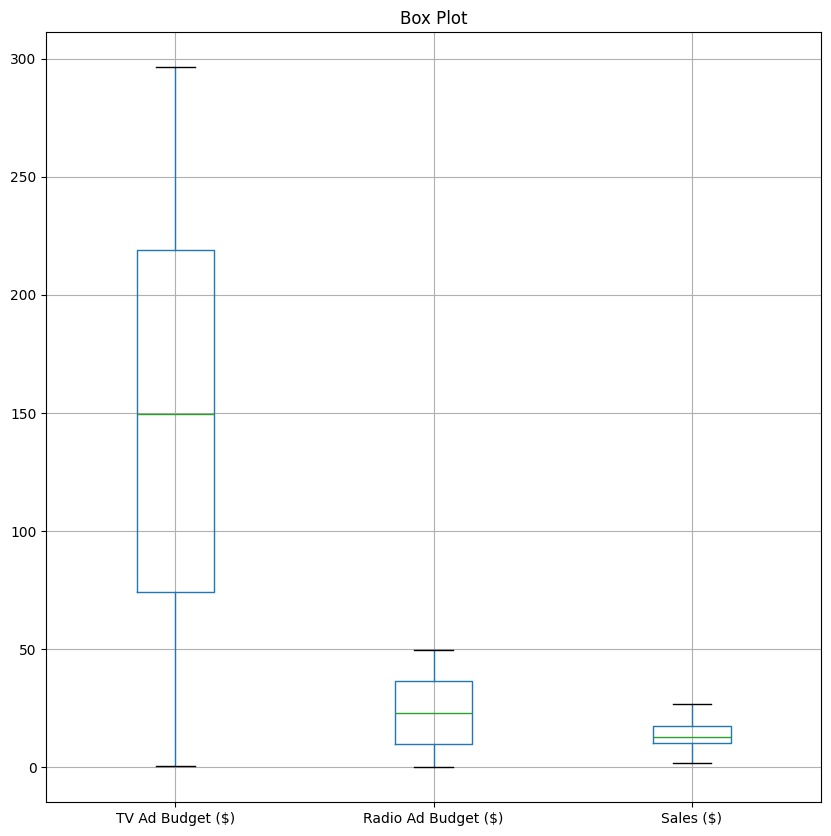

In [73]:
# Box Plot after removing the Newspaper Ad Budget variable
data.boxplot(figsize=(10, 10))
plt.title('Box Plot')
plt.show()

In [74]:
# Check general information and null values again after removing outliers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TV Ad Budget ($)     200 non-null    float64
 1   Radio Ad Budget ($)  200 non-null    float64
 2   Sales ($)            200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [75]:
# New summary after removing outliers
data.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,14.022500
std,85.854236,14.846809,5.217457
min,0.700000,0.000000,1.600000
25%,74.375000,9.975000,10.375000
50%,149.750000,22.900000,12.900000
75%,218.825000,36.525000,17.400000
max,296.400000,49.600000,27.000000


- After evaluating the behavior of the data, it was observed that the variable for newspaper ad spending showed a low correlation with sales which led to the decision to exclude the variable to improve the model's performance.
- Before excluding the newspaper ad spending variable, the z-score analysis indicated two outliers, which were also visually identified in the plots. However, it was not necessary to remove these outliers, as the variable was already excluded.


**Data Preparation and Preprocessing for Machine Learning**

In [76]:
# Definition of variables
y = data['Sales ($)']
X = data.drop('Sales ($)', axis=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data normalization
scaler = StandardScaler()

# Apply scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The variables were separated into target (Sales ($)) and features (the other columns). The data was split into training and test sets (70% for training and 30% for testing) using the train_test_split function. To ensure standardization, I applied the StandardScaler to normalize the data, fitting the scaler to the training set and applying the transformation to both the training and test data.

**Choose a model and apply it**

In [77]:
# Train the KNN model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
score = knn_model.score(X_test, y_test)

# Cross-validation with 5 folds
scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Get the mean of the negative mean squared errors
mean_knn = -scores.mean()

print(f"KNN - R^2 Score: {score}")
print(f"KNN - Mean Squared Error (Cross-validation): {mean_knn}")

KNN - R^2 Score: 0.9614160369144037
KNN - Mean Squared Error (Cross-validation): 1.7783485714285714


In [78]:
# Train the Decision Tree Regression model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
score = dt_model.score(X_test, y_test)

# Cross-validation with 5 folds
scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Get the mean of the negative mean squared errors
mean_dt = -scores.mean()

print(f"Decision Tree - R^2 Score: {score}")
print(f"Decision Tree - Mean Squared Error (Cross-validation): {mean_dt}")

Decision Tree - R^2 Score: 0.9465169646271554
Decision Tree - Mean Squared Error (Cross-validation): 1.5754285714285716


In [79]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
score = lr_model.score(X_test, y_test)

# Cross-validation with 5 folds
scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Get the mean of the negative mean squared errors
mean_lr = -scores.mean()

print(f"Linear Regression - R^2 Score: {score}")
print(f"Linear Regression - Mean Squared Error (Cross-validation): {mean_lr}")

Linear Regression - R^2 Score: 0.8656253548947074
Linear Regression - Mean Squared Error (Cross-validation): 2.670152677594946


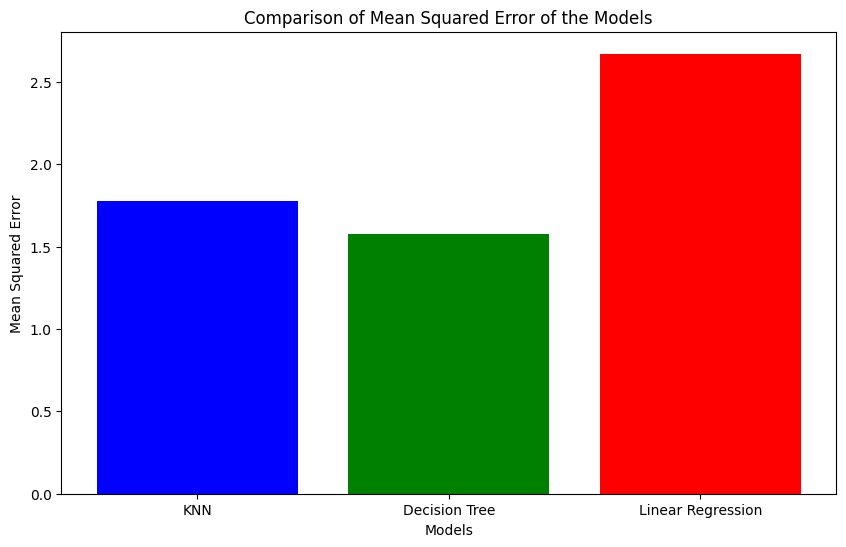

In [80]:
# Compare the mean squared errors of the models
models = ['KNN', 'Decision Tree', 'Linear Regression']
mses = [mean_knn, mean_dt, mean_lr]

plt.figure(figsize=(10, 6))
plt.bar(models, mses, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error of the Models')
plt.show()

Three Machine Learning models were tested to predict sales: KNN (K-Nearest Neighbors), Decision Tree, and Linear Regression. The evaluation of the models was performed using the R² coefficient of determination and Mean Squared Error (MSE), through cross-validation. Although very similar to KNN, the results indicated that the Decision Tree model showed the best performance with an R² value of 94,6% and an MSE of 1.58, making it the most suitable option for the analyzed dataset, as the KNN model with an R² of 96,1% and an MSE of 1.78 carries a higher risk of overfitting.

**Refine the model**

In [81]:
# Defining the Decision Tree model
model = DecisionTreeRegressor()

# Defining the parameter grid for optimization
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse']
}

# Performing the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Displaying the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Evaluating the model with the best parameters
best_model = grid_search.best_estimator_

# Making predictions
y_pred = best_model.predict(X_test)

# Calculating R² and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2}")
print(f"Mean Squared Error: {mse}")

Best parameters found: {'criterion': 'squared_error', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
R²: 0.951339801902928
Mean Squared Error: 1.3286476504629634


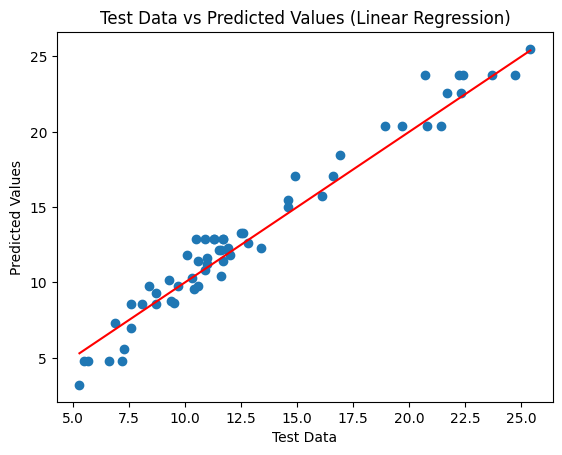

In [82]:
# Scatter plot of test data vs predicted values
plt.scatter(y_test, y_pred)  # Changed y_pred_best to y_pred
plt.xlabel("Test Data")
plt.ylabel("Predicted Values")
plt.title("Test Data vs Predicted Values (Linear Regression)")
x = [min(y_test), max(y_test)]
y = [min(y_test), max(y_test)]
plt.plot(x, y, 'r')
plt.show()

In [83]:
# Create a DataFrame with the coefficients of the best model
columns = X.columns
coefficients_df = pd.DataFrame({'Feature Importance': best_model.feature_importances_}, index=columns)
coefficients_df = coefficients_df.sort_values(by=['Feature Importance'], ascending=False)

# Model formula
print("Sales ($) = ")
for i, (feature, importance) in enumerate(zip(coefficients_df.index, coefficients_df['Feature Importance'])):
    operator = " + " if i > 0 else ""
    print(f"{operator}{importance:.2f} * {feature}")

Sales ($) = 
0.64 * TV Ad Budget ($)
 + 0.36 * Radio Ad Budget ($)


- Initially, the Decision Tree model presented a coefficient of determination R² = 94,6% and an Average Mean Squared Error (MSE) of 1.58. To improve performance, I performed hyperparameter optimization using GridSearchCV with cross-validation.
- Different combinations of maximum depth, minimum samples for split and leaf, number of features, and split criteria were tested.
- The search identified the best parameters:
{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}.
- With the optimized model, performance was significantly improved, increasing the coefficient of determination R² to 95,1% and reducing the Mean Squared Error (MSE) to 1.33. This demonstrates that the optimization enhanced the model's accuracy and reduced prediction errors.
- After analyzing the scatter plot, it was possible to identify alignment between the actual values and the values predicted by the optimized model.
The proximity of the points to the reference line (red line) indicates the model’s strong ability to capture the data pattern. This visualization reinforces the improvement achieved through hyperparameter refinement, highlighting the model’s accuracy in predicting test values.
- The formula generated by the model was as follows: Sales = (0.64 * TV advertising spend) + (0.36 * Radio advertising spend).

**Conclusion**

In [84]:
# Create custom input data for prediction (fictitious values)
custom_input = pd.DataFrame({
    'TV Ad Budget ($)': [5000],
    'Radio Ad Budget ($)': [1500]
})

# Ensure input columns match the training data columns
custom_input = custom_input[X.columns]

# Preprocessing: Scale the data using the same scaler as the training model
custom_input_scaled = scaler.transform(custom_input)

# Convert the scaled data back to a DataFrame
custom_input_scaled_df = pd.DataFrame(custom_input_scaled, columns=X.columns)

# Prediction: Use the trained model to make a prediction
prediction = best_model.predict(custom_input_scaled_df)

# Display the predicted sales value
print("Predicted Sales Value ($):", prediction[0] * 1000)

Predicted Sales Value ($): 10400.0


Based on the formula generated by the optimized model, it was possible to simulate that with a budget of 5.000 USD for TV advertising and 1,500 USD for radio advertising, the predicted sales value was approximately 10,400 USD.